# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.weightstats import ztest

size_sim = 10000
alpha = 0.05    #Significance level

In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


# Helper Methods

In [11]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

In [10]:
def draw_bs_reps(data, func, size=1):
    bs_reps = np.empty(size)
    for i in range(size):
        bs_sample = np.random.choice(data, size=len(data))
        bs_rep = func(bs_sample)
        bs_reps[i] = bs_rep
    return bs_reps

# 1. Is the distribution of body temperatures normal?

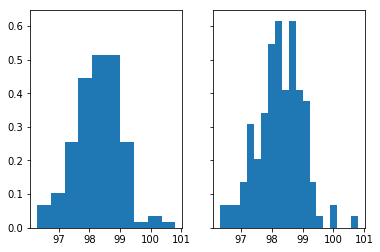

In [155]:
# Visualize temperature data
fig, axs = plt.subplots(1, 2, sharey=True)
axs[0].hist(df.temperature, bins=10, density=True)
axs[1].hist(df.temperature, bins=20, density=True)
plt.show()

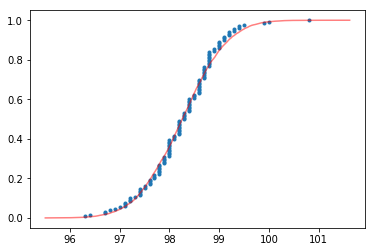

In [156]:
# Plot temperature ECDF
x_temp, y_temp = ecdf(df.temperature)
plt.plot(x_temp, y_temp, marker='.', linestyle='none')


# Plot normal temperature ECDF
mu_temp = np.mean(df.temperature)
sigma_temp = np.std(df.temperature)
norm_temp = np.random.normal(mu_temp, sigma_temp, size_sim)
x_norm_temp, y_norm_temp = ecdf(norm_temp)
plt.plot(x_norm_temp, y_norm_temp, color='red', alpha=0.5)
plt.show()

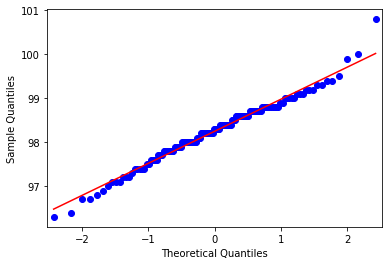

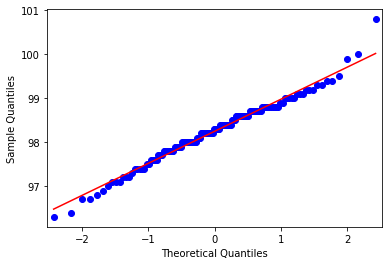

In [8]:
# Quantile-Quantile PlotQQ plot
qqplot(df.temperature, line='s')

In [18]:
# Shapiro-Wilk Test
_, p = stats.shapiro(df.temperature)
if p > 0.05:
    print('The distribution of Body temperature looks normal')
else:
    print('The distribution of body temperature does not look normal')

The distribution of Body temperature looks normal


From the plots and test, we can conclude that the distribution of body temperature **is normal**.

# 2. Is the sample size large? Are the observations independent?

In [10]:
df.count() > 30

temperature    True
gender         True
heart_rate     True
dtype: bool

The sample size is larger than thirty which can ba considered as **large enough**.

A person's temperature and heart rate are hard to affect another's unless they're physical very close to each other during observation. So the observations can be considered as **independent**.

# 3. Is the true population mean really 98.6 degrees F?

## Bootstrap Hypothesis Test

**H0: The true population mean is 98.6F.**

In [12]:
true_temp_mean = 98.6
bs_mean = draw_bs_reps(df.temperature, func=np.mean, size=10000)
p = np.sum(bs_mean >= true_temp_mean) / len(bs_mean)
if p > alpha:
    print(f'The true population mean is {true_temp_mean}F (Fail to reject H0)')
else:
    print(f'The true population mean is not {true_temp_mean}F (Reject H0)')

The true population mean is not 98.6F (Reject H0)


The true population mean is **not** 98.6 degrees F.

## Frequentist Statistical Test

As we are testing if the population mean of the body temperature is equal to a constant (in this case 98.6) instead of if the body temperature of men and women are identical, we should use **one-sample test**.

As the standard deviation of population is unknown, **t statistic test** is often more accurate in this case.

### T Test By Hand

In [34]:
n = len(df.temperature)
t = (mu_temp - true_temp_mean) / sigma_temp * np.sqrt(n)
p = (1 - stats.t.cdf(np.abs(t), df=n-1)) * 2
print(f't: {t}, p: {p}')

t: -5.475925202078116, p: 2.1887464618508545e-07


### T Test By SciPy

In [158]:
t, p = stats.ttest_1samp(df.temperature, true_temp_mean)
print(f't: {t:.2f}, p: {p:.2f}')
if p > alpha:
    print(f'The true population mean is {true_temp_mean}F (Fail to reject H0)')
else:
    print(f'The true population mean is not {true_temp_mean}F (Reject H0)')    

t: -5.45, p: 0.00
The true population mean is not 98.6F (Reject H0)


### Z Test

In [46]:
z, p = ztest(df.temperature)
print(f'z: {z}, p: {p}')
if p > alpha:
    print(f'The true population mean is {true_temp_mean}F (Fail to reject H0)')
else:
    print(f'The true population mean is not {true_temp_mean}F (Reject H0)')

z: 1527.8768644603886, p: 0.0
The true population mean is not 98.6F (Reject H0)


### There is no differnece in the results. This may cause by large sample size.

# 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [7]:
df_temp_10 = df.temperature.sample(n=10, random_state=1)

### T Test

In [16]:
t, p = stats.ttest_1samp(df_temp_10, true_temp_mean)
print(f't: {t}, p: {p}')
if p > alpha:
    print(f'The true population mean is {true_temp_mean}F (Fail to reject H0)')
else:
    print(f'The true population mean is not {true_temp_mean}F (Reject H0)')    

t: -1.9658186252250536, p: 0.08088423631974037
The true population mean is 98.6F (Fail to reject H0)


### Z Test

In [14]:
z, p = ztest(df_temp_10)
print(f'z: {z}, p: {p}')
if p > alpha:
    print(f'The true population mean is {true_temp_mean}F (Fail to reject H0)')
else:
    print(f'The true population mean is not {true_temp_mean}F (Reject H0)')

z: 350.4518476423954, p: 0.0
The true population mean is not 98.6F (Reject H0)


T test for small sample shows a different result. It fails to reject H0.

The reason may be that t-test is more conservative which means that, for small samples, t-test is more likely to fail to reject a false hypothesis.

# 5. At what temperature should we consider someone's temperature to be "abnormal"?

### Assume confidence level is 95%

In [98]:
conf_lev = 0.95
conf_decimals = 3
temp_decimals = 1

## Bootstrap Test

As we're estimating the abnormal temperature, I choose to use __confidence interval__ as test statistics.

In [76]:
conf_per_low = round(0 + (1-conf_lev)/2, decimals)
conf_per_high = round(1 - (1-conf_lev)/2, decimals)

In [88]:
print(f'Percentiles are {conf_per_low, conf_per_high}')

Percentiles are (0.025, 0.975)


In [114]:
df_temp_conf_int = np.percentile(df.temperature, [conf_per_low, conf_per_high])
# Round values
df_temp_conf_int = [round(temp, temp_decimals) for temp in df_temp_conf_int]
print(f'Confidence interval for sample body temperature is {df_temp_conf_int}')

Confidence interval for sample body temperature is [96.3, 96.5]


In [115]:
# Helper method to draw bootstrap replicates of confidence interval
def draw_bs_rep_per(data, conf_pers, size=1):
    bs_con_int_low = np.empty(size)
    bs_con_int_high = np.empty(size)
    for i in range(size):
        bs_sample = np.random.choice(data, len(data))
        bs_con_int = np.percentile(bs_sample, conf_pers)
        bs_con_int_low[i], bs_con_int_high[i] = [round(temp, temp_decimals) for temp in bs_con_int]
    return bs_con_int_low, bs_con_int_high

In [116]:
bs_con_int_low, bs_con_int_high = draw_bs_rep_per(df.temperature, [conf_per_low, conf_per_high], size=10000)

In [125]:
print(f'Confidence interval for sample body temperature is {df_temp_conf_int}')

Confidence interval for sample body temperature is [96.3, 96.5]


### H0: Body temperture which is lower than 96.3F is abnormal.

In [129]:
p_low = np.sum(bs_con_int_low <= df_temp_conf_int[0]) / len(bs_con_int_low)
if p_low > alpha:
    print(f'Body temperature which is lower than 96.3F is abnormal (Fail to reject H0)')
else:
    print(f'Body temperature which is lower then 96.3F is normal (Rject H0)')

Body temperature which is lower than 96.3F is abnormal (Fail to reject H0)


### H0: Body temperture which is larger than 96.5F is abnormal.

In [130]:
p_high = np.sum(bs_con_int_high >= df_temp_conf_int[1]) / len(bs_con_int_high)
if p_high > alpha:
    print(f'Body temperature which is larger than 96.5F is abnormal (Fail to reject H0)')
else:
    print(f'Body temperature which is larger then 96.5F is normal (Rject H0)')

Body temperature which is larger than 96.5F is abnormal (Fail to reject H0)


From the test, we can conclude that, with 95% confidence level:
- Body temperature which is lower than 96.3F is abnormal
- Body temperature which is higher than 96.5F is abnormal

## Frequentist Test

### Z Test

In [174]:
z = stats.norm.ppf(q=conf_per_high)
print(f'z score is {z:.3f}.')

z score is 1.960.


In [181]:
margin_of_error = abs(z * sigma_temp / np.sqrt(n))
print(f'Margin of error is {margin_of_error:.3f}.')

Margin of error is 0.126.


In [172]:
conf_int_low = (df_temp_conf_int[0] - margin_of_error, df_temp_conf_int[0] + margin_of_error)
conf_int_high = (df_temp_conf_int[1] - margin_of_error, df_temp_conf_int[1] + margin_of_error)
print(f'Confidence interval for lower threshold is {conf_int_low}.')
print(f'Confidence interval for higher threshold is {conf_int_high}.')

Confidence interval for lower threshold is (96.17445134222586, 96.42554865777413).
Confidence interval for higher threshold is (96.37445134222587, 96.62554865777413).


From the test, we can conclude that, with 95% confidence level, the low threshold for normal body temperature is within 96.2F and 96.4F. The high threshold for normal body temperature is within 96.4F and 96.7F.

So the conclusion would be:
- Body temperature which is lower than 96.2F is abnormal
- Body temperature which is higher than 96.7F is abnormal

### T Test

In [175]:
t = (mu_temp - true_temp_mean) / sigma_temp * np.sqrt(n)
print(f't score is {t:.3f}.')

t score is -5.476.


In [185]:
margin_of_error = abs(t * sigma_temp / np.sqrt(n))
print(f'Margin of error is {margin_of_error:.3f}.')

Margin of error is 0.351.


In [184]:
conf_int_low = (df_temp_conf_int[0] - margin_of_error, df_temp_conf_int[0] + margin_of_error)
conf_int_high = (df_temp_conf_int[1] - margin_of_error, df_temp_conf_int[1] + margin_of_error)
print(f'Confidence interval for lower threshold is {conf_int_low}.')
print(f'Confidence interval for higher threshold is {conf_int_high}.')

Confidence interval for lower threshold is (95.94923076923078, 96.65076923076921).
Confidence interval for higher threshold is (96.14923076923078, 96.85076923076922).


Similar to z-test, we can conclude that with 95% confidence level:
- Body temperature which is lower than 96.0F is abnormal
- Body temperature which is higher than 96.9F is abnormal

The result also shows that t-test is more conservative than z-test.

# 6. Is there a significant difference between males and females in normal temperature?

## Bootstrap Test

### H0: Means of male and female temperature are the same.

In [131]:
# Helper function to concat and permute two data sets
def perm_sample(data1, data2):
    data = np.concatenate((data1, data2))
    data = np.random.permutation(data)
    perm_data_1 = data[:len(data1)]
    perm_data_2 = data[len(data1):]
    return perm_data_1, perm_data_2

In [133]:
# Helper function to draw bootstrap replicates from permutated data
def draw_perm_reps(data1, data2, func, size=1):
    perm_reps = np.empty(size)
    for i in range(size):
        perm_data_1, perm_data_2 = perm_sample(data1, data2)
        perm_reps[i] = func(perm_data_1, perm_data_2)
    return perm_reps

In [140]:
# Helper function to calculate the difference of means between two data sets
def mean_diff(data1, data2):
    return np.mean(data1) - np.mean(data2)

In [152]:
male_temp = df[df.gender == 'M'].temperature
female_temp = df[df.gender == 'F'].temperature
sample_mean_diff = mean_diff(male_temp, female_temp)
perm_reps = draw_perm_reps(male_temp, female_temp, mean_diff, size=10000)
print(f'Difference of sample means is {sample_mean_diff}')

Difference of sample means is -0.289230769230727


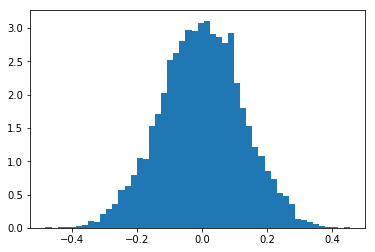

In [151]:
plt.hist(perm_reps, bins=50, density=True)
plt.show()

In [161]:
p_perm = np.sum(perm_reps <= sample_mean_diff) / len(perm_reps)
if p_perm > alpha:
    print(f'Means of male and female temperature are the same. (Fail to reject H0)')
else:
    print(f'Means of male and female temperature are not the same. (Rject H0)')

Means of male and female temperature are not the same. (Rject H0)


### Frequentist Test

For frequentist test, two sample t-test should be used for two reasons:
1. Population standard deviation is unknow.
2. Comparison between two sample means.

In [160]:
t, p = stats.ttest_ind(male_temp, female_temp)
print(f't: {t:.2f}, p: {p:.2f}')
if p > alpha:
    print(f'Means of male and female temperature are the same. (Fail to reject H0)')
else:
    print(f'Means of male and female temperature are not the same. (Rject H0)')

t: -2.29, p: 0.02
Means of male and female temperature are not the same. (Rject H0)


# Observation

We can see that statistically, the conclusion we made for the mean normal body temperature in 1868 is not correct anymore. The reason may be that from 1868, we've been collocting more sample data about the body temperature. As the increase of the sample size, our estimation for the mean normal body temperature is more and more accurate.

Same for the male and female body temperature. From the test we can conclude that statistically there is a significant difference between the normal body temperature of male and female. However, this doesn't mean that the male __population__ body temperature is significantly different from the female __population__ body temperature.